<a href="https://colab.research.google.com/github/long-sleeper/diveintocode-ml/blob/master/term2/Sprint18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint　データセット作成

### ＜目的＞
- データセットを作成し学習する
- データ拡張を行う

### ＜自作データセットの学習＞

自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

### 【問題1】自作データセットでの分類の学習

自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import os
import glob 
import re

import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

自作データセットの読み込み

In [3]:
path = '/content/drive/My Drive/Sprint18/train'
img_list = glob.glob(path + '/*' + ".jpg")
img_list

['/content/drive/My Drive/Sprint18/train/dog_2.jpg',
 '/content/drive/My Drive/Sprint18/train/dog_1.jpg',
 '/content/drive/My Drive/Sprint18/train/cat_5.jpg',
 '/content/drive/My Drive/Sprint18/train/cat_2.jpg',
 '/content/drive/My Drive/Sprint18/train/cat_1.jpg',
 '/content/drive/My Drive/Sprint18/train/cat_3.jpg',
 '/content/drive/My Drive/Sprint18/train/cat_4.jpg',
 '/content/drive/My Drive/Sprint18/train/dog_3.jpg',
 '/content/drive/My Drive/Sprint18/train/dog_4.jpg',
 '/content/drive/My Drive/Sprint18/train/dog_5.jpg']

In [4]:
# イメージのロード、配列化、リサイズ、データセット作成
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:  
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        dog_img_ = Image.open(img)
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        # 正規化
        dog_img = dog_img / 255.
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        cat_img_ = Image.open(img)
        cat_img_ = cat_img_.resize((224, 224))
        cat_img = np.array(cat_img_)
        cat_img = cat_img / 255.
        cat_img = cat_img.reshape((1,224,224,3))
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

img_array = np.concatenate([dog_img_array, cat_img_array], axis=0)
print('dog+cat_image:{}'.format(img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)
dog+cat_image:(10, 224, 224, 3)


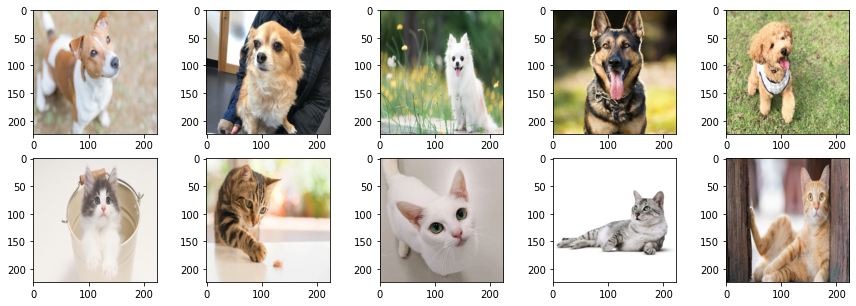

In [ ]:
# 可視化
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(img_array[i])

学習

In [10]:
# データ・ラベルの作成・分割
from sklearn.model_selection import train_test_split

# yはone hot形式にする
X = np.concatenate([dog_img_array, cat_img_array], axis=0)
y = np.hstack([np.zeros(5).astype(int), np.ones(5).astype(int)])
y = np.eye(2)[y]

# 分割
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=1)

print('X_train size :', X_train.shape)
print('X_val size : ', X_val.shape)
print('y_train size : ', y_train.shape)
print('y_val size : ', y_val.shape)

X_train size : (7, 224, 224, 3)
X_val size :  (3, 224, 224, 3)
y_train size :  (7, 2)
y_val size :  (3, 2)


まずはそのまま

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras

model_1 = tf.keras.Sequential([
          tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(224,224,3)),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(60, activation='relu'),
          tf.keras.layers.Dense(40, activation='relu'),
          tf.keras.layers.Dense(2, activation='softmax')])

model_1.summary()
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
history = model_1.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=1,
                      epochs=10,
                      verbose=1)

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 60)                5598780   
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2

ほぼ学習されず、当て推量の精度

### 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。


**《データ拡張のためのライブラリ》**


データ拡張にはalbumentationsなどがあります。


albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries


また、Kerasを使う場合はImageDataGeneratorも便利です。




**《データ拡張の効果の調査》**


データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。



1. Pixel-level transforms

In [5]:
from albumentations import (ChannelShuffle,
                            CLAHE, 
                            RandomContrast,
                            RandomGamma,
                            RandomBrightness,
                            Blur, 
                            MotionBlur,
                            IAASharpen,
                            IAAEmboss)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


augmented_dogs_image(total) : 45
augmented_cats_image(total) : 45


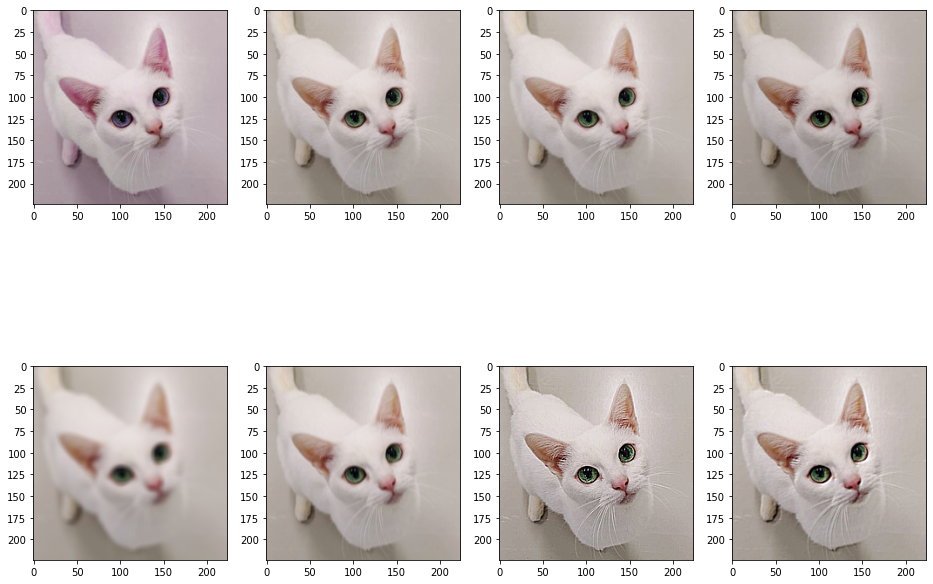

In [8]:
# データ拡張

cs = ChannelShuffle(p=1)
rc = RandomContrast(p=1)
rg = RandomGamma(p=1)
rb = RandomBrightness(p=1) 
blur = Blur(p=1)
mblur = MotionBlur(p=1)
iaas = IAASharpen(p=1)
iaae = IAAEmboss(p=1)


augs = [cs,rc,rg,rb,blur,mblur,iaas,iaae]
aug_dogs = dog_img_array.copy()
aug_cats = cat_img_array.copy()
dog_labels = np.zeros(5).astype(int)
cat_labels = np.ones(5).astype(int)

plt.figure(figsize=(16,12))
for i, aug in enumerate(augs):
  for dog in dog_img_array:
    # 拡張した画像データをリストへ格納
    aug_dog = aug(image=dog)['image']
    aug_dogs = np.vstack([aug_dogs, aug_dog[None,:]])
    # 該当するラベルも同時に格納
    dog_labels = np.hstack([dog_labels, np.zeros(1).astype(int)])
  
  for cat in cat_img_array:
    aug_cat = aug(image=cat)['image']
    aug_cats = np.vstack([aug_cats, aug_cat[None,:]])
    cat_labels = np.hstack([cat_labels, np.ones(1).astype(int)])

  # 例として画像表示
  plt.subplot(2, 4, i+1)
  plt.imshow(aug_cats[5*(i+1)+2])

print('augmented_dogs_image(total) :', len(aug_dogs))
print('augmented_cats_image(total) :', len(aug_cats))

In [12]:
# データ・ラベルの作成・分割
X = np.vstack([aug_dogs, aug_cats])
labels = np.hstack([dog_labels, cat_labels])
y = np.eye(2)[labels]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1)

print('X_train size :', X_train.shape)
print('X_val size : ', X_val.shape)
print('y_train size : ', y_train.shape)
print('y_val size : ', y_val.shape)

X_train size : (72, 224, 224, 3)
X_val size :  (18, 224, 224, 3)
y_train size :  (72, 2)
y_val size :  (18, 2)


In [13]:
# 上記のデータで学習
model_2 = tf.keras.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(224,224,3)),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(120, activation='relu'),
          tf.keras.layers.Dense(80, activation='relu'),
          tf.keras.layers.Dense(2, activation='softmax')])
model_2.summary()
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=0, 
                                           patience=10, 
                                           verbose=0, 
                                           mode='auto')

history = model_2.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=5,
                      epochs=10,
                      callbacks=[early_stop],
                      verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               22395000  
_________________________________________________________________
dense_4 (Dense)              (None, 80)               

2. Spatial-level transforms

In [15]:
from albumentations import (HorizontalFlip, 
                            VerticalFlip,
                            Crop,
                            RandomRotate90,
                            RandomScale,
                            Transpose, 
                            ShiftScaleRotate, 
                            RandomSizedCrop,
                            GridDistortion, 
                            ElasticTransform)

augmented_dogs_image(total) : 45
augmented_cats_image(total) : 45


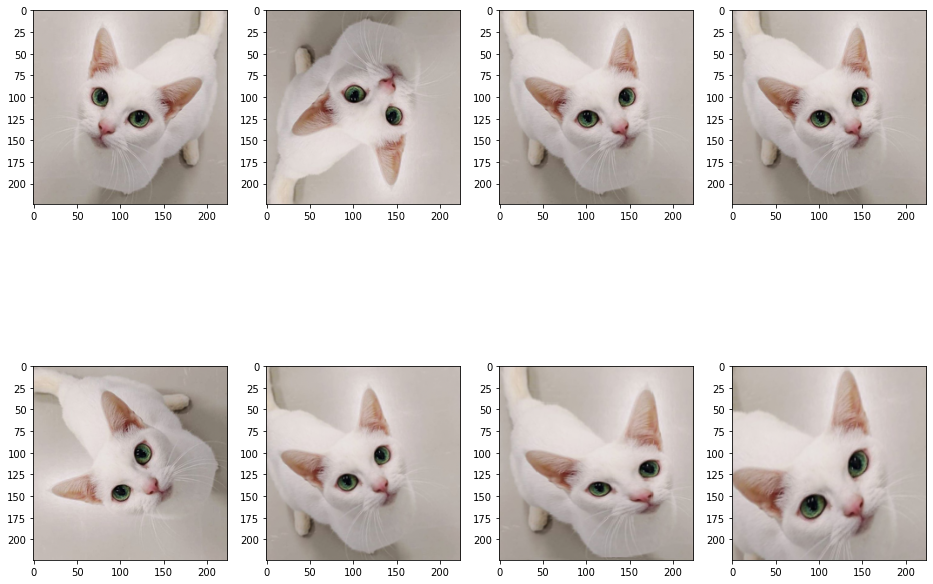

In [16]:
# データ拡張

hf = HorizontalFlip(p=1)
vf = VerticalFlip(p=1)
crop = Crop(x_max=224, y_max=224)
rot = RandomRotate90(p=1)
trans = Transpose(p=1)
ssrot = ShiftScaleRotate(p=1)
gd = GridDistortion(p=1)
et = ElasticTransform(p=1)

augs = [hf,vf,crop,rot,trans,ssrot,gd,et]
aug_dogs = dog_img_array.copy()
aug_cats = cat_img_array.copy()
dog_labels = np.zeros(5).astype(int)
cat_labels = np.ones(5).astype(int)

plt.figure(figsize=(16,12))
for i, aug in enumerate(augs):
  for dog in dog_img_array:
    # 拡張した画像データをリストへ格納
    aug_dog = aug(image=dog)['image']
    aug_dogs = np.vstack([aug_dogs, aug_dog[None,:]])
    # 該当するラベルも同時に格納
    dog_labels = np.hstack([dog_labels, np.zeros(1).astype(int)])
  
  for cat in cat_img_array:
    aug_cat = aug(image=cat)['image']
    aug_cats = np.vstack([aug_cats, aug_cat[None,:]])
    cat_labels = np.hstack([cat_labels, np.ones(1).astype(int)])

  # 例として画像表示
  plt.subplot(2, 4, i+1)
  plt.imshow(aug_cats[5*(i+1)+2])

print('augmented_dogs_image(total) :', len(aug_dogs))
print('augmented_cats_image(total) :', len(aug_cats))

In [17]:
# データ・ラベルの作成・分割
X = np.vstack([aug_dogs, aug_cats])
labels = np.hstack([dog_labels, cat_labels])
y = np.eye(2)[labels]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1)

print('X_train size :', X_train.shape)
print('X_val size : ', X_val.shape)
print('y_train size : ', y_train.shape)
print('y_val size : ', y_val.shape)

X_train size : (72, 224, 224, 3)
X_val size :  (18, 224, 224, 3)
y_train size :  (72, 2)
y_val size :  (18, 2)


In [18]:
model_3 = tf.keras.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(224,224,3)),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(120, activation='relu'),
          tf.keras.layers.Dense(80, activation='relu'),
          tf.keras.layers.Dense(2, activation='softmax')])
model_3.summary()
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=0, 
                                           patience=10, 
                                           verbose=0, 
                                           mode='auto')

history = model_3.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=5,
                      epochs=10,
                      callbacks=[early_stop],
                      verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               22395000  
_________________________________________________________________
dense_7 (Dense)              (None, 80)               

3. Pixel-level + Spatial-level

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


augmented_dogs_image(total) : 85
augmented_cats_image(total) : 85


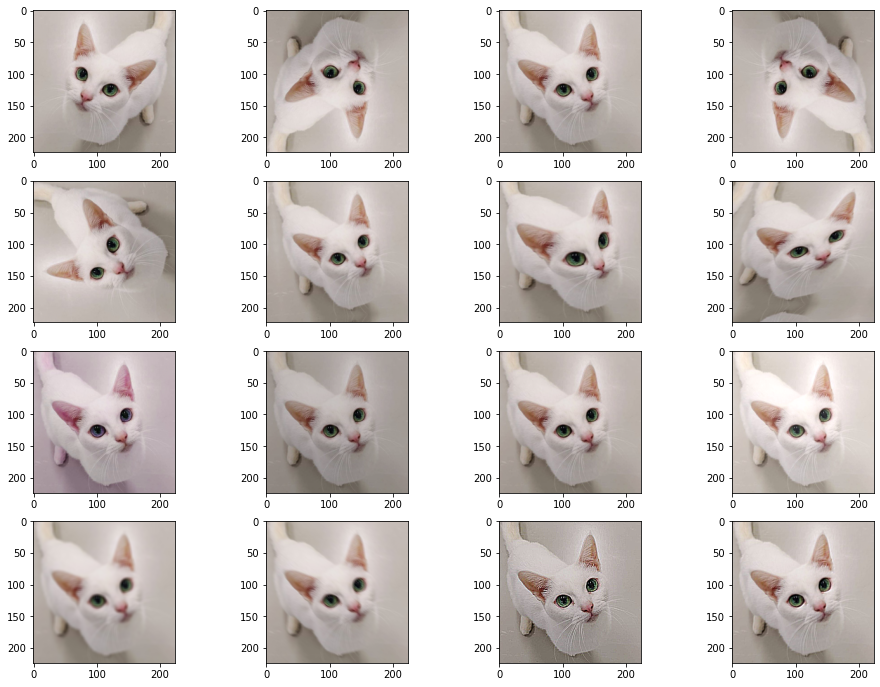

In [19]:
# データ拡張

hf = HorizontalFlip(p=1)
vf = VerticalFlip(p=1)
crop = Crop(x_max=224, y_max=224)
rot = RandomRotate90(p=1)
trans = Transpose(p=1)
ssrot = ShiftScaleRotate(p=1)
gd = GridDistortion(p=1)
et = ElasticTransform(p=1)
cs = ChannelShuffle(p=1)
rc = RandomContrast(p=1)
rg = RandomGamma(p=1)
rb = RandomBrightness(p=1) 
blur = Blur(p=1)
mblur = MotionBlur(p=1)
iaas = IAASharpen(p=1)
iaae = IAAEmboss(p=1)


augs = [hf,vf,crop,rot,trans,ssrot,gd,et,cs,rc,rg,rb,blur,mblur,iaas,iaae]
aug_dogs = dog_img_array.copy()
aug_cats = cat_img_array.copy()
dog_labels = np.zeros(5).astype(int)
cat_labels = np.ones(5).astype(int)

plt.figure(figsize=(16,12))
for i, aug in enumerate(augs):
  for dog in dog_img_array:
    # 拡張した画像データをリストへ格納
    aug_dog = aug(image=dog)['image']
    aug_dogs = np.vstack([aug_dogs, aug_dog[None,:]])
    # 該当するラベルも同時に格納
    dog_labels = np.hstack([dog_labels, np.zeros(1).astype(int)])
  
  for cat in cat_img_array:
    aug_cat = aug(image=cat)['image']
    aug_cats = np.vstack([aug_cats, aug_cat[None,:]])
    cat_labels = np.hstack([cat_labels, np.ones(1).astype(int)])

  # 例として画像表示
  plt.subplot(4, 4, i+1)
  plt.imshow(aug_cats[5*(i+1)+2])

print('augmented_dogs_image(total) :', len(aug_dogs))
print('augmented_cats_image(total) :', len(aug_cats))

In [20]:
# データ・ラベルの作成・分割
X = np.vstack([aug_dogs, aug_cats])
labels = np.hstack([dog_labels, cat_labels])
y = np.eye(2)[labels]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1)

print('X_train size :', X_train.shape)
print('X_val size : ', X_val.shape)
print('y_train size : ', y_train.shape)
print('y_val size : ', y_val.shape)

X_train size : (136, 224, 224, 3)
X_val size :  (34, 224, 224, 3)
y_train size :  (136, 2)
y_val size :  (34, 2)


In [21]:
model_4 = tf.keras.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(224,224,3)),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(120, activation='relu'),
          tf.keras.layers.Dense(80, activation='relu'),
          tf.keras.layers.Dense(2, activation='softmax')])
model_4.summary()
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           min_delta=0, 
                                           patience=10, 
                                           verbose=0, 
                                           mode='auto')

history = model_4.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=5,
                      epochs=10,
                      callbacks=[early_stop],
                      verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               22395000  
_________________________________________________________________
dense_10 (Dense)             (None, 80)               

early stopをかけたが、訓練lossは減少する一方で検証lossはプラトーに入っており、過学習しているようだ

＜テストデータの推論＞  
1.ピクセル単位の拡張、2.空間単位の拡張、3.両者を合わせた拡張 の3つのモデルで精度を比較してみる

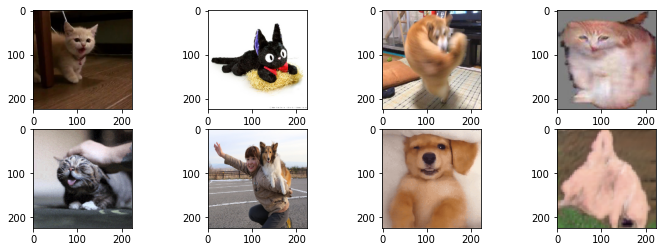

In [23]:
from keras.preprocessing.image import load_img, img_to_array

path = '/content/drive/My Drive/Sprint18/test'
img_list = glob.glob(path + '/*' + ".jpg")

img_keras_array = []
test_labels = []
for img in img_list:
  img_keras = load_img(img, grayscale=False, color_mode='rgb', target_size=(224,224))
  img_array = img_to_array(img_keras) / 255.
  img_keras_array.append(img_array)

  if re.search('dog', img):
    test_labels.append(0)
  else:
    test_labels.append(1)

# 可視化
plt.figure(figsize=(12,4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(img_keras_array[i])

In [24]:
# データ・ラベルの作成・分割
X_test = np.array(img_keras_array)
y_test = np.eye(2)[test_labels]

print('X_test size :', X_test.shape)
print('y_test size : ', y_test.shape)

X_test size : (8, 224, 224, 3)
y_test size :  (8, 2)


In [25]:
print('== pixel-level ==')
preds = np.argmax(model_2.predict(X_test), axis=1)
print('predict : ', preds)
print('labels  : ', np.array(test_labels))
acc = sum(preds==test_labels)/len(test_labels)
print('Accuracy : ', acc)

print('\n== spatial-level ==')
preds = np.argmax(model_3.predict(X_test), axis=1)
print('predict : ', preds)
print('labels  : ', np.array(test_labels))
acc = sum(preds==test_labels)/len(test_labels)
print('Accuracy : ', acc)

print('\n== pixel + spatial ==')
preds = np.argmax(model_4.predict(X_test), axis=1)
print('predict : ', preds)
print('labels  : ', np.array(test_labels))
acc = sum(preds==test_labels)/len(test_labels)
print('Accuracy : ', acc)

== pixel-level ==
predict :  [0 1 1 1 0 1 1 1]
labels  :  [1 1 0 1 1 0 0 0]
Accuracy :  0.25

== spatial-level ==
predict :  [0 1 1 1 0 1 1 0]
labels  :  [1 1 0 1 1 0 0 0]
Accuracy :  0.375

== pixel + spatial ==
predict :  [0 1 0 1 0 1 1 0]
labels  :  [1 1 0 1 1 0 0 0]
Accuracy :  0.5


＜考察＞  
僅かな違いだが、pixel-levelよりもspatial-levelの拡張の方が学習に寄与するようだ。  
pixel-levelでは変形が伴わないため一般的な犬・猫の特徴を学習することが難しく、spatial-levelでの変形が一般化に重要なのではないかと思われる。  
当然ながら両者を合わせたものが最も精度が良くなったが、単に学習データ量の違いによる効果ともとれる。

### 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


**《アノテーションのためのツール》**


アノテーションツールにはLabelImgなどがあります。


tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images



In [ ]:
# PascalVOC形式で作成
path = '/content/drive/My Drive/Sprint18/annotation_train'
bbox_list = glob.glob(path + '/*' + ".xml")
bbox_list

['/content/drive/My Drive/Sprint18/annotation_train/cat_1.xml',
 '/content/drive/My Drive/Sprint18/annotation_train/cat_2.xml',
 '/content/drive/My Drive/Sprint18/annotation_train/cat_3.xml',
 '/content/drive/My Drive/Sprint18/annotation_train/cat_4.xml',
 '/content/drive/My Drive/Sprint18/annotation_train/cat_5.xml',
 '/content/drive/My Drive/Sprint18/annotation_train/dog_1.xml',
 '/content/drive/My Drive/Sprint18/annotation_train/dog_2.xml',
 '/content/drive/My Drive/Sprint18/annotation_train/dog_3.xml',
 '/content/drive/My Drive/Sprint18/annotation_train/dog_4.xml',
 '/content/drive/My Drive/Sprint18/annotation_train/dog_5.xml']

In [ ]:
from xml.etree import ElementTree

bboxes = []
for file in bbox_list:
    tree = ElementTree.parse(file)
    annotation = tree.findall('object/bndbox')
    bbox = []
    for i in range(4):
      bbox.append(int(annotation[0][i].text))
    bboxes.append(bbox)
print('bounding box : ')
bboxes

bounding box : 


[[7, 2, 534, 620],
 [29, 16, 420, 406],
 [12, 119, 473, 405],
 [123, 6, 570, 352],
 [440, 16, 807, 641],
 [154, 38, 522, 480],
 [23, 6, 738, 675],
 [992, 169, 1935, 1098],
 [108, 1, 387, 491],
 [103, 26, 479, 579]]

In [ ]:
import cv2

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.imshow(img)

In [ ]:
# xmlファイルに順番を合わせる
sorted(img_list)

['/content/drive/My Drive/Sprint18/train/cat_1.jpg',
 '/content/drive/My Drive/Sprint18/train/cat_2.jpg',
 '/content/drive/My Drive/Sprint18/train/cat_3.jpg',
 '/content/drive/My Drive/Sprint18/train/cat_4.jpg',
 '/content/drive/My Drive/Sprint18/train/cat_5.jpg',
 '/content/drive/My Drive/Sprint18/train/dog_1.jpg',
 '/content/drive/My Drive/Sprint18/train/dog_2.jpg',
 '/content/drive/My Drive/Sprint18/train/dog_3.jpg',
 '/content/drive/My Drive/Sprint18/train/dog_4.jpg',
 '/content/drive/My Drive/Sprint18/train/dog_5.jpg']

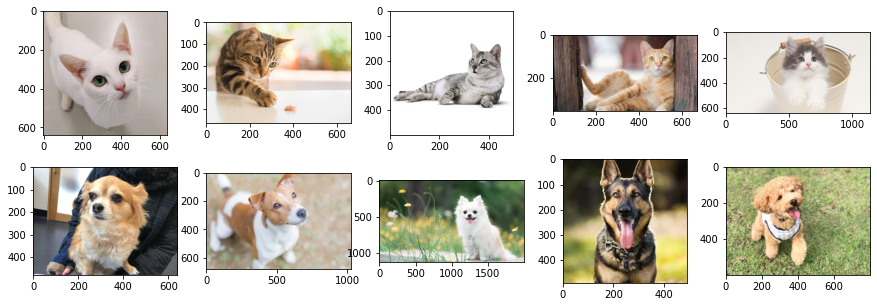

In [ ]:
# オリジナルサイズの画像リスト作成
images = []
plt.figure(figsize=(15,5))
for i, img in enumerate(sorted(img_list)):
  plt.subplot(2, 5, i+1)
  img_ = Image.open(img)
  img_ = np.array(img_)
  images.append(img_)
  plt.imshow(img_)

In [ ]:
category_id_to_name = {0: 'dog', 1: 'cat'}

# ラベル作成
id = []
for i in range(5):
  id.append(1)
for j in range(5):
  id.append(0)
print('id :', id)

id : [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


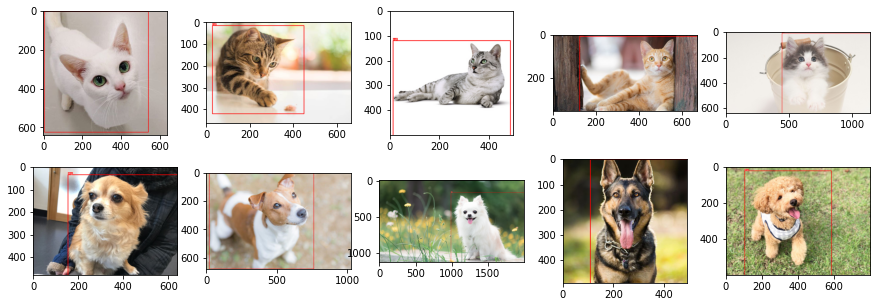

In [ ]:
plt.figure(figsize=(15,5))
for i in range(10):
  annotations = {'image': images[i], 
                 'bboxes': [bboxes[i]], 
                 'category_id': [id[i]]}
  plt.subplot(2, 5, i+1)
  visualize(annotations, category_id_to_name)

PascalVOCで作成したはずだが、ずれている…  
BoundBoxの座標を調整しないといけないようだ

In [ ]:
# bboxの座標修正
bboxes_1 = []
for bbox in bboxes:
  bbox_1 = [bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]]
  bboxes_1.append(bbox_1)

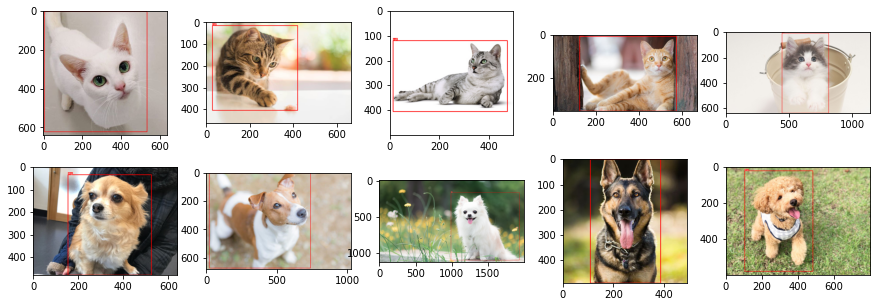

In [ ]:
plt.figure(figsize=(15,5))
for i in range(10):
  annotations = {'image': images[i], 
                 'bboxes': [bboxes_1[i]], 
                 'category_id': [id[i]]}
  plt.subplot(2, 5, i+1)
  visualize(annotations, category_id_to_name)

正しいBoundBoxが表示された

###【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。

In [ ]:
from albumentations import Compose
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params={'format':'coco', 'label_fields':['category_id']})

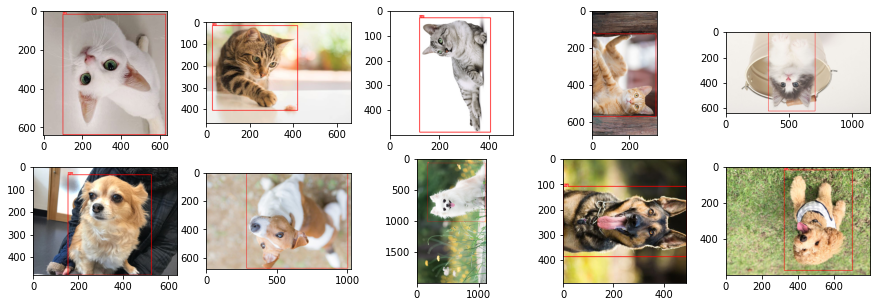

In [ ]:
# ランダムに90°回転
aug = get_aug([RandomRotate90(p=1)])
plt.figure(figsize=(15,5))
for i in range(10):
  annotations = {'image': images[i], 
                 'bboxes': [bboxes_1[i]], 
                 'category_id': [id[i]]}
  augmented = aug(**annotations)
  plt.subplot(2, 5, i+1)
  visualize(augmented, category_id_to_name)

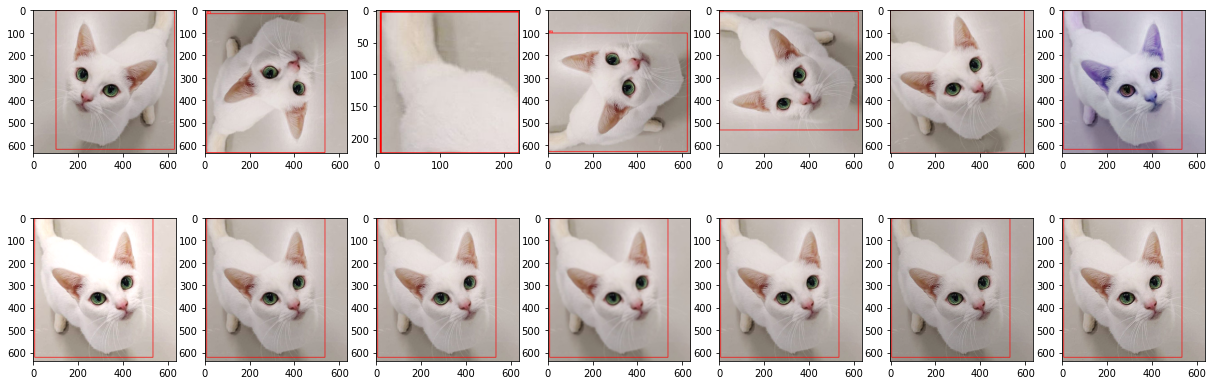

In [ ]:
# データ拡張

hf = HorizontalFlip(p=1)
vf = VerticalFlip(p=1)
crop = Crop(x_max=224, y_max=224)
rot = RandomRotate90(p=1)
trans = Transpose(p=1)
ssrot = ShiftScaleRotate(p=1)
cs = ChannelShuffle(p=1)
rc = RandomContrast(p=1)
rg = RandomGamma(p=1)
rb = RandomBrightness(p=1) 
blur = Blur(p=1)
mblur = MotionBlur(p=1)
iaas = IAASharpen(p=1)
iaae = IAAEmboss(p=1)

augs = [hf,vf,crop,rot,trans,ssrot,cs,rc,rg,rb,blur,mblur,iaas, iaae]
aug_images = []
aug_labels = []

plt.figure(figsize=(21,7))
for i, aug_ in enumerate(augs):
  aug = get_aug([aug_])
  for j in range(10):
    annotations = {'image': images[j], 
                   'bboxes': [bboxes_1[j]], 
                   'category_id': [id[j]]}
    augmented = aug(**annotations)
    aug_images.append(augmented)

  # 例として画像表示
  plt.subplot(2, 7, i+1)
  visualize(aug_images[10*i], category_id_to_name)

bounding box を含めてデータ拡張されている

物体検知の学習は省略